In [1]:
import logging
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt 
import seaborn as sns
from ema import OptimizedEma

logging.basicConfig(level=logging.INFO)
sns.set_theme(style='darkgrid')

In [2]:
df_ufi = pd.read_csv('../input/us_financial_indices_2021.csv').assign(
    DATE=lambda d: pd.to_datetime(d.DATE)
).set_index('DATE')
df_ufi

,DJIA,SP500,NASDAQ100
DATE,,,
2021-01-04,30223.89,3700.65,12694.66
2021-01-05,30391.60,3726.86,12802.38
2021-01-06,30829.40,3748.14,12623.35
2021-01-07,31041.13,3803.79,12939.57
2021-01-08,31097.97,3824.68,13105.20
...,...,...,...
2021-12-27,36302.38,4791.19,16567.50
2021-12-28,36398.21,4786.35,16488.66
2021-12-29,36488.63,4793.06,16491.01


In [3]:
oe = OptimizedEma(y=df_ufi.SP500, test_size=30, ewm_span_range=slice(2, 180), disp=True)
df_fit = oe.calculate_ema()
df_fit

INFO:ema:self.test_size: 30
INFO:ema:self.ewm_span_range: slice(2, 180, None)
INFO:ema:loss: 2      227.728113
3      223.279963
4      212.246176
5      198.093941
6      186.068460
          ...    
175    214.114733
176    214.264529
177    214.413432
178    214.561454
179    214.708605
Length: 178, dtype: float64
INFO:ema:self.ewm_span: 12


,SP500,SP500_ema
DATE,,
2021-01-04,3700.65,3700.650000
2021-01-05,3726.86,3704.682308
2021-01-06,3748.14,3711.368107
2021-01-07,3803.79,3725.586859
2021-01-08,3824.68,3740.831958
...,...,...
2021-12-27,4791.19,4681.824207
2021-12-28,4786.35,4697.905098
2021-12-29,4793.06,4712.544314


<AxesSubplot:xlabel='DATE'>

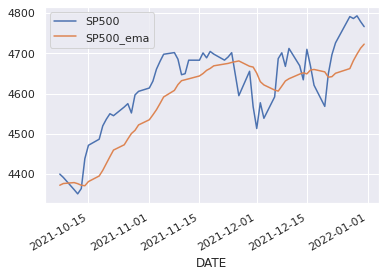

In [4]:
df_plt = df_fit.assign(SP500_ema=lambda d: d.SP500_ema.shift()).tail(60)
df_plt.plot.line()

In [5]:
lr_sp500 = np.log(df_ufi.SP500).diff().iloc[1:].ewm(span=6).mean()
oe = OptimizedEma(y=lr_sp500, test_size=30, ewm_span_range=slice(2, 180), disp=True)
df_fit = oe.calculate_ema()
df_fit

INFO:ema:self.test_size: 30
INFO:ema:self.ewm_span_range: slice(2, 180, None)
INFO:ema:loss: 2      -62.862125
3      -74.082726
4      -84.223304
5      -93.590644
6     -100.960103
          ...    
175   -123.077977
176   -123.081036
177   -123.083823
178   -123.086336
179   -123.088576
Length: 178, dtype: float64
INFO:ema:self.ewm_span: 179


,SP500,SP500_ema
DATE,,
2021-01-05,0.007058,0.007058
2021-01-06,0.006262,0.007049
2021-01-07,0.010072,0.007082
2021-01-08,0.008297,0.007096
2021-01-11,0.003077,0.007051
...,...,...
2021-12-27,0.007078,0.001248
2021-12-28,0.004767,0.001287
2021-12-29,0.003805,0.001315


<AxesSubplot:xlabel='DATE'>

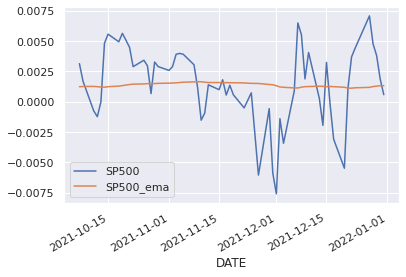

In [6]:
df_plt = df_fit.assign(SP500_ema=lambda d: d.SP500_ema.shift()).tail(60)
df_plt.plot.line()